# Calidad del aire

Librerías necesarias para la realización del Trabajo en Grupo

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.listdir('data')

['aire18.csv', 'trafico_octubre.csv']

Se comienza con el csv que ofrece los datos de la calidad del aire de Madrid. Veamos el aspecto que presentan los datos

In [3]:
!head -n 3 data/aire18.csv

PROVINCIA;MUNICIPIO;ESTACION;MAGNITUD;PUNTO_MUESTREO;ANO;MES;D01;V01;D02;V02;D03;V03;D04;V04;D05;V05;D06;V06;D07;V07;D08;V08;D09;V09;D10;V10;D11;V11;D12;V12;D13;V13;D14;V14;D15;V15;D16;V16;D17;V17;D18;V18;D19;V19;D20;V20;D21;V21;D22;V22;D23;V23;D24;V24;D25;V25;D26;V26;D27;V27;D28;V28;D29;V29;D30;V30;D31;V31
28;079;4;1;28079004_1_38;2018;01;00001;V;00001;V;00002;V;00001;V;00001;V;00001;V;00001;V;00002;V;00003;V;00001;V;00001;V;00004;V;00002;V;00001;V;00002;V;00003;V;00004;V;00006;V;00006;V;00004;V;00003;V;00005;V;00006;V;00006;V;00005;V;00002;V;00002;V;00002;V;00006;V;00005;V;00006;V
28;079;4;1;28079004_1_38;2018;02;00005;V;00003;V;00002;V;00001;V;00001;V;00002;V;00003;V;00003;V;00004;V;00003;V;00003;V;00002;V;00003;V;00002;V;00002;V;00003;V;00003;V;00002;V;00003;V;00004;V;00002;V;00004;V;00004;V;00004;V;00005;V;00006;V;00003;V;00002;V00000N00000N00000N


In [80]:
df = pd.read_csv(os.path.join('data', 'aire18.csv'), sep=';')

In [5]:
df.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2018,1,1.0,V,1.0,...,2.0,V,2.0,V,6.0,V,5.0,V,6.0,V
1,28,79,4,1,28079004_1_38,2018,2,5.0,V,3.0,...,3.0,V,2.0,V00000N00000N00000N,NaN,NaN,NaN,NaN,NaN,NaN
2,28,79,4,1,28079004_1_38,2018,3,1.0,V,2.0,...,2.0,V,4.0,V,2.0,V,2.0,V,2.0,V
3,28,79,4,1,28079004_1_38,2018,4,2.0,V,3.0,...,1.0,V,2.0,V,2.0,V,2.0,V00000N,NaN,NaN
4,28,79,4,1,28079004_1_38,2018,5,2.0,V,2.0,...,2.0,V,2.0,V,3.0,V,2.0,V,2.0,V


In [6]:
df.columns

Index(['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO',
       'ANO', 'MES', 'D01', 'V01', 'D02', 'V02', 'D03', 'V03', 'D04', 'V04',
       'D05', 'V05', 'D06', 'V06', 'D07', 'V07', 'D08', 'V08', 'D09', 'V09',
       'D10', 'V10', 'D11', 'V11', 'D12', 'V12', 'D13', 'V13', 'D14', 'V14',
       'D15', 'V15', 'D16', 'V16', 'D17', 'V17', 'D18', 'V18', 'D19', 'V19',
       'D20', 'V20', 'D21', 'V21', 'D22', 'V22', 'D23', 'V23', 'D24', 'V24',
       'D25', 'V25', 'D26', 'V26', 'D27', 'V27', 'D28', 'V28', 'D29', 'V29',
       'D30', 'V30', 'D31', 'V31'],
      dtype='object')

Se definen los siguientes boooleanos para estudiar si el argumento D o V va seguido de dos dígitos

In [7]:
import re

day_regexp = re.compile('D\d{2}')
valid_regexp = re.compile('V\d{2}')
bool(day_regexp.search('D23')), bool(valid_regexp.search('V03'))

(True, True)

In [8]:
bool(day_regexp.search('MUNICIPIO'))

False

Se crean dos listas con los nombres de los días y sus validaciones

In [81]:
ID_VARS = ['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO',
           'ANO', 'MES']
DAY_VARS = [name for name in df.columns if day_regexp.search(name)]
IS_VALID_VARS = [name for name in df.columns if valid_regexp.search(name)]
DAY_VARS[:10]

['D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10']

Con el siguiente bucle se consigue que si en la validación del día i tenemos un valor distinto de 'V', entonces en el día i su valor será NaN.

In [82]:
for col in DAY_VARS:
    verification_col = col.replace('D', 'V')
    bool_col = df[verification_col].eq('V').map(np.invert)
    df.loc[bool_col, col] = np.nan

In [83]:
df.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2018,1,1.0,V,1.0,...,2.0,V,2.0,V,6.0,V,5.0,V,6.0,V
1,28,79,4,1,28079004_1_38,2018,2,5.0,V,3.0,...,3.0,V,NaN,V00000N00000N00000N,NaN,NaN,NaN,NaN,NaN,NaN
2,28,79,4,1,28079004_1_38,2018,3,1.0,V,2.0,...,2.0,V,4.0,V,2.0,V,2.0,V,2.0,V
3,28,79,4,1,28079004_1_38,2018,4,2.0,V,3.0,...,1.0,V,2.0,V,2.0,V,NaN,V00000N,NaN,NaN
4,28,79,4,1,28079004_1_38,2018,5,2.0,V,2.0,...,2.0,V,2.0,V,3.0,V,2.0,V,2.0,V


Con la función melt se reforman las fechas del csv original. Se consigue que éstos aparezcan en una sóla columna, junto a otra columna (CONTAMINACION_AIRE) con los valores de la magnitud del parámetro de contaminación medido para tal técnica de medida utilizada en ese punto de muestreo.

In [84]:
day_df = pd.melt(df, var_name='DAY', value_name='CONTAMINACION_AIRE',
                 col_level=0,
                 id_vars=ID_VARS,
                 value_vars=DAY_VARS)

day_df.DAY = day_df.DAY.str.replace('\D', '').astype('int')
day_df['date'] = (day_df.ANO.astype('str') + 
                  day_df.MES.astype('str').str.zfill(2) + 
                  day_df.DAY.astype('str').str.zfill(2))

day_df.date = pd.to_datetime(day_df.date, format="%Y%m%d", errors='coerce')
day_df.dropna(subset=['date'], inplace=True)

day_df.sort_values(['PUNTO_MUESTREO', 'date', 'CONTAMINACION_AIRE'], inplace=True)
day_df.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DAY,CONTAMINACION_AIRE,date
40,28,79,4,12,28079004_12_8,2018,1,1,24.0,2018-01-01
1544,28,79,4,12,28079004_12_8,2018,1,2,38.0,2018-01-02
3048,28,79,4,12,28079004_12_8,2018,1,3,63.0,2018-01-03
4552,28,79,4,12,28079004_12_8,2018,1,4,38.0,2018-01-04
6056,28,79,4,12,28079004_12_8,2018,1,5,43.0,2018-01-05


Comprobemos que no hay ningún NaN en date, ya que se han borrado los días finales no existentes en algunos meses, como por ejemplo el 31 de Febreo.

In [85]:
day_df.date.isnull().sum()

0

Estudiemos los nan para el todas las variables

In [12]:
day_df.isnull().sum()

PROVINCIA                0
MUNICIPIO                0
ESTACION                 0
MAGNITUD                 0
PUNTO_MUESTREO           0
ANO                      0
MES                      0
DAY                      0
CONTAMINACION_AIRE    1012
date                     0
dtype: int64

Luego en este dataset correspondiente al año 2018 encontramos NaNs en el campo correspondiente a la contaminación del aire. Se selecciona el mes de Octubre, para que los resultados tengan concordancia con los datos del tráfico

In [86]:
print(day_df.shape)
oct_df = day_df.loc[day_df.MES.eq(10)]
print(oct_df.shape)

(45721, 10)
(4681, 10)


Se agrupa por punto de muestro y date

In [87]:
final_df = oct_df.groupby(['PUNTO_MUESTREO', 'date']).mean()
final_df.head()

PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD   ANO  \
PUNTO_MUESTREO date                                                         
28079004_12_8  2018-10-01         28         79         4        12  2018   
               2018-10-02         28         79         4        12  2018   
               2018-10-03         28         79         4        12  2018   
               2018-10-04         28         79         4        12  2018   
               2018-10-05         28         79         4        12  2018   

                           MES  DAY  CONTAMINACION_AIRE  
PUNTO_MUESTREO date                                      
28079004_12_8  2018-10-01   10    1                57.0  
               2018-10-02   10    2               119.0  
               2018-10-03   10    3               167.0  
               2018-10-04   10    4               216.0  
               2018-10-05   10    5               194.0

Al seleccionar este mes, se ha pasado de 1012 NaN a 36, en el campo ONTAMINACION_AIRE

In [88]:
final_df.CONTAMINACION_AIRE.isnull().sum()

36

In [89]:
final_df = final_df.reset_index()
final_df.columns = final_df.columns.str.lower()
final_df.head()

,punto_muestreo,date,provincia,municipio,estacion,magnitud,ano,mes,day,contaminacion_aire
0,28079004_12_8,2018-10-01,28,79,4,12,2018,10,1,57.0
1,28079004_12_8,2018-10-02,28,79,4,12,2018,10,2,119.0
2,28079004_12_8,2018-10-03,28,79,4,12,2018,10,3,167.0
3,28079004_12_8,2018-10-04,28,79,4,12,2018,10,4,216.0
4,28079004_12_8,2018-10-05,28,79,4,12,2018,10,5,194.0


De nuevo, para la comparabilidad de resultados con el dataset del tráfico, se selecciona un punto de muestreo común en ambos conjuntos de datos. Buscando información, vemos que se repite la recogida de datos por los sensorees tanto en Moratalaz como en Vallecas. Seleccionemos el primero.

Añadimos una columna con el primer término (anterior a _) del punto de muestreo y a partir de ella podríamos seleccionar el punto de muestreo de Moratalaz, con valor 28079036

In [91]:
final_df['punto_muestreo_main'] = final_df.punto_muestreo.str.split('_', expand=True)[0]

In [92]:
final_df.head()

,punto_muestreo,date,provincia,municipio,estacion,magnitud,ano,mes,day,contaminacion_aire,punto_muestreo_main
0,28079004_12_8,2018-10-01,28,79,4,12,2018,10,1,57.0,28079004
1,28079004_12_8,2018-10-02,28,79,4,12,2018,10,2,119.0,28079004
2,28079004_12_8,2018-10-03,28,79,4,12,2018,10,3,167.0,28079004
3,28079004_12_8,2018-10-04,28,79,4,12,2018,10,4,216.0,28079004
4,28079004_12_8,2018-10-05,28,79,4,12,2018,10,5,194.0,28079004


In [93]:
print(final_df.shape)
final_df = final_df.loc[final_df.punto_muestreo_main.eq('28079036')]
print(final_df.shape)

(4681, 11)
(186, 11)


Se observa que tras realizar la selección anterior no quedarían NaN entre nuestros datos

In [94]:
final_df.contaminacion_aire.isnull().sum()

0

Si se hubiera dado el caso en que sí que hubiera presencia de estos valores, se podrían haber sustituido por la contaminacion del dia anterior, ya que es un valor que podría ser razonablemente similar `final_df.CONTAMINACION_AIRE.fillna(method='ffill', inplace=True)`

Este punto de muestreo se subdivide en función del contaminante medido (17 posibles) y la técnica usada para ello (otras 17). Se ha decidido tomar una medida global de la contaminación, tomando la media de los valores anteriores para cada punto de muestreo.

In [95]:
grouped_cont_df = final_df.groupby('date').contaminacion_aire.mean().to_frame()

In [96]:
grouped_cont_df.head()

,contaminacion_aire
date,
2018-10-01,10.850000
2018-10-02,20.533333
2018-10-03,30.716667
2018-10-04,32.866667
2018-10-05,42.383333


# Tráfico

In [25]:
os.listdir('data')

['aire18.csv', 'trafico_octubre.csv']

Lectura del csv del tráfico, seleccionando por la ID del punto de medida de Moratalaz (6118).

In [97]:
traffic_df = pd.read_csv(os.path.join('data', 'trafico_octubre.csv'), sep=';')
traffic_df = traffic_df.loc[traffic_df.id == 6118]

In [98]:
traffic_df.head()

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
7262553,6118,2018-10-01 00:00:00,URB,51.0,1.0,6.0,NaN,N,15
7262554,6118,2018-10-01 00:15:00,URB,62.0,NaN,6.0,NaN,N,15
7262555,6118,2018-10-01 00:30:00,URB,47.0,2.0,7.0,NaN,N,15
7262556,6118,2018-10-01 00:45:00,URB,25.0,NaN,4.0,NaN,N,15
7262557,6118,2018-10-01 01:00:00,URB,46.0,NaN,4.0,NaN,N,15


Para poder posteriormente realizar comparaciones entre los distintos dataset, se crea la columna date con las fechas con un periodo diario

In [99]:
traffic_df['date'] = pd.to_datetime(traffic_df.fecha.str.split(' ', expand=True)[0],  #Nos quedamos con lo anterior al espacio
                                    format="%Y-%m-%d") 
traffic_df.reset_index(inplace=True, drop=True)

In [101]:
traffic_df.head()

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,date
0,6118,2018-10-01 00:00:00,URB,51.0,1.0,6.0,NaN,N,15,2018-10-01
1,6118,2018-10-01 00:15:00,URB,62.0,NaN,6.0,NaN,N,15,2018-10-01
2,6118,2018-10-01 00:30:00,URB,47.0,2.0,7.0,NaN,N,15,2018-10-01
3,6118,2018-10-01 00:45:00,URB,25.0,NaN,4.0,NaN,N,15,2018-10-01
4,6118,2018-10-01 01:00:00,URB,46.0,NaN,4.0,NaN,N,15,2018-10-01


Veamos los valores de error. Estos valores pueden ser:
    * N: No ha habido errores ni sustituciones 
    * E: Los parámetros de calidad de algunas de las muestras no son óptimos
    * S: Alguna de las muestras recibidas era totalmente errónea y no se ha integrado

In [33]:
traffic_df.error.value_counts()

N    2946
Name: error, dtype: int64

Todo los datos han sido recogidos correctamente ya que en esta ubicación todos los valores son N. A continuación se observa que las variables vmed y tipo_elem no aportan información

In [147]:
traffic_df.vmed.value_counts()

Series([], Name: vmed, dtype: int64)

In [148]:
traffic_df.tipo_elem.value_counts()

URB    2946
Name: tipo_elem, dtype: int64

Veamos que efectivamente el dataframe completo coincide con el que sólo toma N como valor para error

In [102]:
print(traffic_df.shape)
traffic_df = traffic_df.loc[traffic_df.error.eq('N')]
print(traffic_df.shape)

(2946, 10)
(2946, 10)


Eliminamos las columnas innecesarias

In [103]:
DROP_COLUMNS = ['id', 'fecha', 'tipo_elem', 'vmed', 'periodo_integracion', 'error']
traffic_df.drop(DROP_COLUMNS, axis=1, inplace=True)

In [104]:
traffic_df.head()

,intensidad,ocupacion,carga,date
0,51.0,1.0,6.0,2018-10-01
1,62.0,NaN,6.0,2018-10-01
2,47.0,2.0,7.0,2018-10-01
3,25.0,NaN,4.0,2018-10-01
4,46.0,NaN,4.0,2018-10-01


Y agrupamos por fechas, obteniendo la media de intensidad, ocupación y carga en cada día

In [105]:
grouped_traffic_df = traffic_df.groupby('date').mean().reset_index()
grouped_traffic_df.head()

,date,intensidad,ocupacion,carga
0,2018-10-01,187.437500,11.217949,25.739130
1,2018-10-02,187.479167,13.230769,25.468085
2,2018-10-03,183.937500,13.080000,24.989362
3,2018-10-04,194.975000,11.492063,26.513158
4,2018-10-05,171.395062,8.910448,23.179487


In [106]:
grouped_traffic_df.shape

(31, 4)

# Merge

Veamos el aspecto de los dos dataframe finales y los unimos con Merge

In [107]:
grouped_cont_df.head()

,contaminacion_aire
date,
2018-10-01,10.850000
2018-10-02,20.533333
2018-10-03,30.716667
2018-10-04,32.866667
2018-10-05,42.383333


In [108]:
grouped_traffic_df.head()

,date,intensidad,ocupacion,carga
0,2018-10-01,187.437500,11.217949,25.739130
1,2018-10-02,187.479167,13.230769,25.468085
2,2018-10-03,183.937500,13.080000,24.989362
3,2018-10-04,194.975000,11.492063,26.513158
4,2018-10-05,171.395062,8.910448,23.179487


In [109]:
full_df = pd.merge(grouped_traffic_df, 
                   grouped_cont_df, 
                   how='left', on='date', 
                   validate='one_to_one')
full_df.set_index('date', inplace=True)

In [110]:
full_df.head()

,intensidad,ocupacion,carga,contaminacion_aire
date,,,,
2018-10-01,187.437500,11.217949,25.739130,10.850000
2018-10-02,187.479167,13.230769,25.468085,20.533333
2018-10-03,183.937500,13.080000,24.989362,30.716667
2018-10-04,194.975000,11.492063,26.513158,32.866667
2018-10-05,171.395062,8.910448,23.179487,42.383333


Representemos la información gráficamente

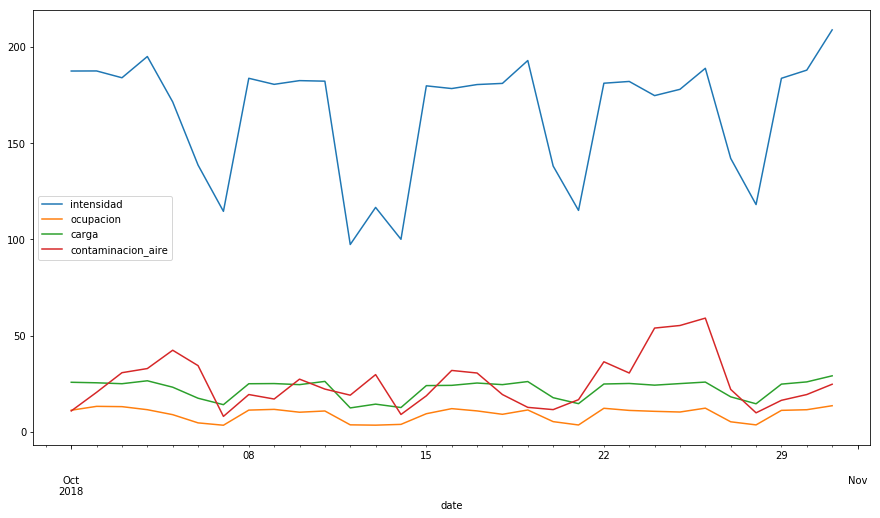

In [111]:
full_df.plot(figsize=(15, 8))

No se percibe una relación significativa entre la contaminación del aire y alguna de las variable del tráfico para el mes de Octubre. Estudiemos su matriz de correlación

In [112]:
full_df.corr()

,intensidad,ocupacion,carga,contaminacion_aire
intensidad,1.000000,0.954977,0.995560,0.339095
ocupacion,0.954977,1.000000,0.962420,0.353054
carga,0.995560,0.962420,1.000000,0.356648
contaminacion_aire,0.339095,0.353054,0.356648,1.000000


Intentemos estudiar una posible relación entre la calidad del aire de cada día con el tráfico de días anteriores. Concretamente se estudia la posible influencia de las medidas del tráfico del día anterior, además de  la media de los 3 y 7 días anteriores sobre la contaminación del aire.

In [113]:
RAW_PREDICTOR_COLUMNS = ['intensidad', 'ocupacion', 'carga']
OBJECTIVE_COLUMN = 'contaminacion_aire'
ROLLING_HORIZONS = [3, 7]

for col in RAW_PREDICTOR_COLUMNS:
    col_name = col + 'shifted_l1'
    full_df[col_name] = full_df[col].shift(1)  #Con esto conseguimos darle a cada una de las variables el valor del día anterior (tráfico)
    
    for horizon in ROLLING_HORIZONS:
        col_name = col + '_mean_' + str(horizon) + 'd' 
        full_df[col_name] = full_df[col].rolling(horizon).mean()

In [114]:
full_df.head()

,intensidad,ocupacion,carga,contaminacion_aire,intensidadshifted_l1,intensidad_mean_3d,intensidad_mean_7d,ocupacionshifted_l1,ocupacion_mean_3d,ocupacion_mean_7d,cargashifted_l1,carga_mean_3d,carga_mean_7d
date,,,,,,,,,,,,,
2018-10-01,187.437500,11.217949,25.739130,10.850000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-02,187.479167,13.230769,25.468085,20.533333,187.437500,NaN,NaN,11.217949,NaN,NaN,25.739130,NaN,NaN
2018-10-03,183.937500,13.080000,24.989362,30.716667,187.479167,186.284722,NaN,13.230769,12.509573,NaN,25.468085,25.398859,NaN
2018-10-04,194.975000,11.492063,26.513158,32.866667,183.937500,188.797222,NaN,13.080000,12.600944,NaN,24.989362,25.656868,NaN
2018-10-05,171.395062,8.910448,23.179487,42.383333,194.975000,183.435854,NaN,11.492063,11.160837,NaN,26.513158,24.894002,NaN


In [115]:
full_df.corr().contaminacion_aire.sort_values(ascending=False)

contaminacion_aire      1.000000
ocupacion_mean_3d       0.529291
carga_mean_3d           0.474027
intensidad_mean_3d      0.439973
carga                   0.356648
ocupacion               0.353054
ocupacionshifted_l1     0.346963
intensidad              0.339095
cargashifted_l1         0.303721
intensidadshifted_l1    0.265793
carga_mean_7d           0.138148
ocupacion_mean_7d       0.125243
intensidad_mean_7d      0.091856
Name: contaminacion_aire, dtype: float64

Se selecciona tan sólo la variable con mayor correlación con la contaminacion del aire, es decir la ocupación media de los 3 días anteriores, para compararla con la contaminación

In [116]:
contaminacion = full_df.contaminacion_aire
ocupacion_mean_3d = full_df.ocupacion_mean_3d

In [118]:
vars_of_interest = ['contaminacion_aire', 'ocupacion_mean_3d']
full_df_final = full_df[vars_of_interest]

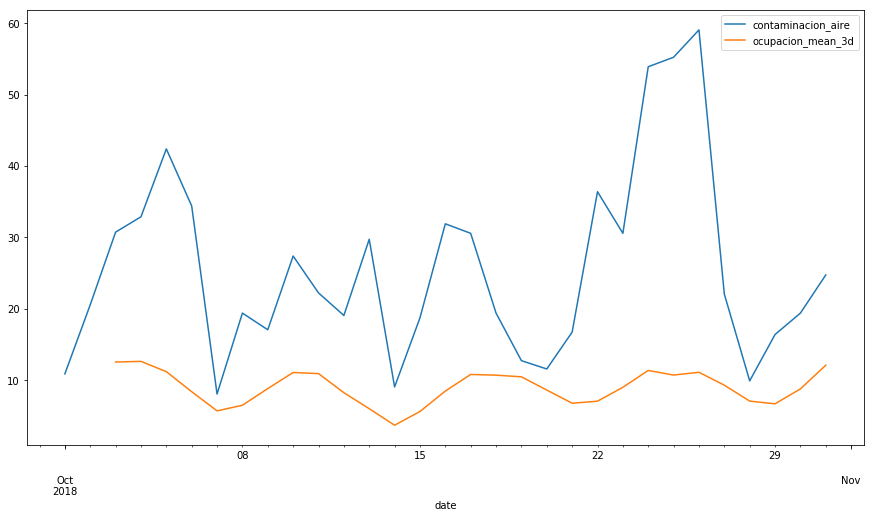

In [119]:
full_df_final.plot(figsize=(15, 8))